# pandas tutorial

![pandas logo](https://pandas.pydata.org/_static/pandas_logo.png)

*Author: Fabio Hernandez*

*Last updated: 2020-02-13*

*Location:* https://github.com/airnandez/numpandas

<a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/pandas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

--------------------
## Introduction

This is a short tutorial for helping you getting familiar with the **pandas** library, which is built on top of NumPy: you can find an introduction to NumPy in [this notebook](NumPy.ipynb).

This tutorial draws inspiration, ideas and sometimes material from several publicly available sources. Please see the [Acknowledgements](#Acknowledgements) section for details.

-----------------------
## Reference documentation

The entry point to the documentation of the stable release of pandas is http://pandas.pydata.org/pandas-docs/stable. It includes a [user guide](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), an [API reference](http://pandas.pydata.org/pandas-docs/stable/reference/index.html) and a [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

The [DataCamp pandas Cheat Sheet](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf) can also be a useful resource.

---------------------
## Import

**pandas** is customarily imported as shown below:

In [1]:
import pandas as pd
pd.__version__

'0.25.1'

In addition, for the examples given in this notebook we will need some packages from the Python standard library so we import them here:

In [2]:
import datetime

----------
## Overview

**pandas** offers three main data structures designed to facilitate the programmatic manipulation of datasets with flexibility. Those data structures are `DataFrame`, `Series` and `Index`. We will start exploring what a `DataFrame` is and what we can do with it.

![dataframe](../images/dataframe-axis.png)

---------------------
## Load the dataset

Read a sample dataset, located in the `data` subdirectory, which is formatted as a sequence of lines, each line composed of series of comma-separated values. Our sample dataset contains some data about the European Union, extracted from several sources, including [Wikipedia](https://en.wikipedia.org/wiki/European_Union), [EuroStat](https://ec.europa.eu/eurostat) and the [EU Budget](http://ec.europa.eu/budget) site.

In [1]:
%%bash

mkdir -p '../data'
dataset_file='../data/european_union-2019.csv'
if [[ ! -e ${dataset_file} ]]; then
   curl -s -L --output ${dataset_file}  "https://raw.githubusercontent.com/airnandez/numpandas/master/data/european_union-2019.csv"
fi

# Inspect a few lines of the text file containing the dataset
head -5 ${dataset_file}

﻿country;country_code;capital;accession_date;population;euro_zone_member;immigration;emigration;contribution_to_eu_budget_millions_euro;expenditure_eu_budget_millions_euro
Austria;AT;Vienna;1995-01-01;8858775;TRUE;111801;66144;3277,09735;1952,627788
Belgium;BE;Brussels;1957-03-25;11455519;TRUE;126703;89690;3839,758857;8513,575724
Bulgaria;BG;Sofia;2007-01-01;7000039;FALSE;25597;31586;487,0919477;2168,57991
Cyprus;CY;Nicosia;2004-05-01;875899;TRUE;21306;15105;180,2888903;263,8683639


In [4]:
# This particular dataset uses ';' as column separator (instead of the more usual ',') and ',' as decimal separator
df = pd.read_csv('../data/european_union-2019.csv', sep=';', decimal=',')

In [5]:
# Inspect the dimensions of the dataframe
rows, columns = df.shape
print(f'This dataframe has {rows} rows and {columns} columns')

This dataframe has 28 rows and 10 columns


**pandas** has built-in methods for doing I/O with files in several formats, including flat files (csv, fixed-width format, msgpack), Excel, JSON, HTML, HDF5, parquet, SQL, etc. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/io.html#flat-file) for details.

---------------------
## Exploring the dataset contents

To get an idea of what data is included in the dataset, you can explore the contents of the whole dataframe.

<font color='white' style="background-color:#DC3D1B;"> WARNING </font>: it is not generally a good idea to display the entire dataset, depending of the size of the data. It is recommended to first inspect the size of the dataframe as we did above. Our dataset is small, so display it:

In [6]:
df

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
1,Belgium,BE,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
2,Bulgaria,BG,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910
3,Cyprus,CY,Nicosia,2004-05-01,875899,True,21306,15105,180.288890,263.868364
4,Czechia,CZ,Prague,2004-05-01,10649800,False,51847,27316,1720.125653,4123.183653
5,Germany,DE,Berlin,1957-03-25,83019213,True,917109,560700,25266.700000,12053.941540
6,Denmark,DK,Copenhaguen,1973-01-01,5806081,False,68579,56403,2541.231086,1411.196408
7,Estonia,EE,Tallinn,2004-05-01,1324820,True,17616,12358,210.169766,759.415329
8,Greece,EL,Athens,1981-01-01,10724599,True,112247,103327,1487.695262,4870.119593
9,Spain,ES,Madrid,1986-01-01,46937060,True,532132,368860,10313.863210,12270.403390


You can also explore a fraction of the dataset by displaying, for instance, a few rows at the begining or at the end of the dataframe:

In [7]:
# Display the first 3 rows of the dataset. By default, the first 5 rows will be displayed
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
1,Belgium,BE,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
2,Bulgaria,BG,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


You can also explore the last rows of the dataset or any intermediate rows, by using notation similar to the one used with NumPy arrays, on top of which **pandas** is built:

In [8]:
# Display the last 3 rows of the dataset
df.tail(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
25,Sweden,SE,Stockholm,1995-01-01,10230185,False,144489,45620,3303.487551,1814.183134
26,Slovenia,SI,Ljubljana,2004-05-01,2080908,True,18808,17555,385.709254,926.832646
27,Slovakia,SK,Bratislava,2004-05-01,5450421,True,7188,3466,763.637289,2457.231604


In [9]:
# Display the rows from position 10 up to position 14 (not included)
df[10:14]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
10,Finland,FI,Helsinki,1995-01-01,5517919,True,31797,16973,2018.347388,1477.728942
11,France,FR,Paris,1957-03-25,67012883,True,369964,312554,20573.549170,14778.253970
12,United Kingdom,GB,London,1973-01-01,66647112,False,644209,359665,13461.886890,6633.149657
13,Croatia,HR,Zagreb,2013-07-01,4076246,False,15553,47352,450.777400,1120.285398


Displaying a small random sample of the dataframe rows is generally good practice:

In [10]:
# Select 5 randomly selected rows and all columns
df.sample(5)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
16,Italy,IT,Rome,1957-03-25,60359546,True,343440,155110,15215.087820,10336.967450
23,Portugal,PT,Lisbon,1986-01-01,10276617,True,36639,31753,1699.368003,5010.759804
19,Latvia,LV,Riga,2004-05-01,1919968,True,9916,17724,234.031998,1211.796292
20,Malta,MT,Valletta,2004-05-01,493559,True,21676,7020,102.557846,155.961396
26,Slovenia,SI,Ljubljana,2004-05-01,2080908,True,18808,17555,385.709254,926.832646


**pandas** is designed for efficient handling of datasets organized as follows:

* each **observation** is saved in its own row
* each **variable** is saved in its own column

Our sample dataset is organized in exactly that way.

### An aside: understanding the dataset

In order to analyse any dataset, you need a good understanding of the meaning of the data. Here are the details of our sample data set:

| column                                    | meaning |
| ------------------------------------------|----------|
| `country`                                 | name of the country, in English |
| `country_code`                            | code of the country, as used by [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes) |
| `accession_date`                          | date of accesion of the country to the European Union (format: yyyy-mm-dd) |
| `population`                              | the number of persons having their usual residence in each country as of January 1st, 2019 (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00001)) |
| `euro_zone_member`                        | `True` if the country is member of the [Eurozone](https://en.wikipedia.org/wiki/Eurozone)  |
| `immigration`                             | total number of long-term immigrants arriving into each country in 2017, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00176)) |
| `emigration`                              | total number of long-term emigrants leaving from the reporting country in 2017, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00177))  | 
| `contribution_to_eu_budget_millions_euro` | contribution to the EU budget for each country for year 2018, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |
| `expenditure_eu_budget_millions_euro`     | expenditure of the EU budget per country (for all programs), for year 2018, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |

Generally speaking, in order to draw sensible conclusions from any dataset you are analysing, make sure you understand precisely what is contained in the dataset and you understand where the data comes from.

### `dataframe` properties

You can get some information on the properties of `dataframe`. The attribute `Dataframe.columns` is an object of type `Index` (see [reference documentation](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html#index)):

In [11]:
# Get the name of the columns in this dataframe
for c in df.columns:
    print(c)

country
country_code
capital
accession_date
population
euro_zone_member
immigration
emigration
contribution_to_eu_budget_millions_euro
expenditure_eu_budget_millions_euro


In [12]:
# Get the number of values (of any type) contained in the dataframe
print(f'This dataframe contains {df.size} values')

This dataframe contains 280 values


In [13]:
# Get the amount of RAM (in bytes) used for storing this dataframe contents
df.memory_usage()

Index                                      128
country                                    224
country_code                               224
capital                                    224
accession_date                             224
population                                 224
euro_zone_member                            28
immigration                                224
emigration                                 224
contribution_to_eu_budget_millions_euro    224
expenditure_eu_budget_millions_euro        224
dtype: int64

### Cleaning the data

Very often, the *raw* data needs some cleaning, so that we can easily manipulate them it in **pandas**. For instance, in this particular example, we need to make sure that **pandas** understands that the column `accession_date` is a date and not just a string. This is useful for comparisons and filtering, that will visit later on.

In [14]:
# Display the types of each column in the dataframe
df.dtypes

country                                     object
country_code                                object
capital                                     object
accession_date                              object
population                                   int64
euro_zone_member                              bool
immigration                                  int64
emigration                                   int64
contribution_to_eu_budget_millions_euro    float64
expenditure_eu_budget_millions_euro        float64
dtype: object

In [15]:
# Convert column 'accession_date' to a date
df['accession_date'] = df['accession_date'].astype('datetime64[D]')
df['accession_date'].dtype

dtype('<M8[ns]')

-------
## Selecting and filtering

**pandas** provides powerful built-in tools for filtering the data row-wise and column-wise.

In [16]:
# This is a utility function we use for displaying the dataframe, which we use later
def highlight_column(s):
    return 'background-color: PaleGoldenrod'

### select all values in a given column

Selecting all the values in a column is a frequent operation we need to perform on any dataframe:

In [17]:
# Highlight the column 'population' that we want to select
df.head(3).style.applymap(highlight_column, subset=['population'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8858775,True,111801,66144,3277.1,1952.63
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11455519,True,126703,89690,3839.76,8513.58
2,Bulgaria,BG,Sofia,2007-01-01 00:00:00,7000039,False,25597,31586,487.092,2168.58


In [18]:
# Retrieve the values of the column 'population' for all rows
df['population']

0      8858775
1     11455519
2      7000039
3       875899
4     10649800
5     83019213
6      5806081
7      1324820
8     10724599
9     46937060
10     5517919
11    67012883
12    66647112
13     4076246
14     9772756
15     4904240
16    60359546
17     2794184
18      613894
19     1919968
20      493559
21    17282163
22    37972812
23    10276617
24    19414458
25    10230185
26     2080908
27     5450421
Name: population, dtype: int64

The value returned by this selection operation is a [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object. A `Series` is a **one-dimensional array** with axis labels. In this particular case, the labels are integers but they may be of other types.

**NOTE**: it is possible to use the notation `df.population` to select all the values of the column `population`. However, this notation is not recommended since the name of the column must be a valid Python identifier for it to work. For instacnce, if the name of my column is `budget-contribution`, this notation cannot be used:

In [19]:
# WARNING: This notation is NOT recommended. Use instead:: df['population']
df.population

0      8858775
1     11455519
2      7000039
3       875899
4     10649800
5     83019213
6      5806081
7      1324820
8     10724599
9     46937060
10     5517919
11    67012883
12    66647112
13     4076246
14     9772756
15     4904240
16    60359546
17     2794184
18      613894
19     1919968
20      493559
21    17282163
22    37972812
23    10276617
24    19414458
25    10230185
26     2080908
27     5450421
Name: population, dtype: int64

We can perform operations on all the numerical values of a column (i.e. a `pandas.Series` object), such as descriptive statistics:

In [20]:
# Display some descriptive statistics of the values in the 'population' column
df['population'].describe()

count    2.800000e+01
mean     1.833827e+07
std      2.381944e+07
min      4.935590e+05
25%      3.755730e+06
50%      9.315766e+06
75%      1.781524e+07
max      8.301921e+07
Name: population, dtype: float64

You can also compute a subset of the descriptive statistics or perform an arithmetic operation on all the values of the `Series`:

In [21]:
df['population'].count()

28

In [22]:
mean, std = df['population'].mean(), df['population'].std()
print(f'Population: µ={mean:,.0f}  σ={std:,.0f}')

Population: µ=18,338,274  σ=23,819,440


In [23]:
# Sum all the values of the column 'population'
eu_population = df['population'].sum()
print(f'The population of the EU is {eu_population:,} people')

The population of the EU is 513,471,676 people


You can also perform an operation on all the values of one (or more) columns. For instance, let's convert all the population values to millions before performing some additional operations:

In [24]:
# Divide all the values of the column 'population' by one million
population = df['population'] / 1_000_000  # you can also use the notations 1e6 or 1000000

# Retrieve the min and max values of the series
min_population, max_population = population.min(), population.max()

# Sum all the values of the series
total_population = population.sum()

# Count the number of values in the series
num_countries = population.count()

print(f'The least populous country has {min_population:.1f} millions')
print(f'The most populous country has {max_population:.1f} millions')
print(f'Total EU population is {total_population:.1f} millions located in {num_countries} countries')

The least populous country has 0.5 millions
The most populous country has 83.0 millions
Total EU population is 513.5 millions located in 28 countries


### select rows satisfying one or more conditions

You can select the rows of the dataframe that satisfy one or more conditions on the values of a column. You can use logical expressions with those conditions (i.e. using operators and, or, not) to select the rows of interest:

In [25]:
# Let's first visualize the column 'euro_zone_member'
df.style.applymap(highlight_column, subset=['euro_zone_member'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8858775,True,111801,66144,3277.1,1952.63
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11455519,True,126703,89690,3839.76,8513.58
2,Bulgaria,BG,Sofia,2007-01-01 00:00:00,7000039,False,25597,31586,487.092,2168.58
3,Cyprus,CY,Nicosia,2004-05-01 00:00:00,875899,True,21306,15105,180.289,263.868
4,Czechia,CZ,Prague,2004-05-01 00:00:00,10649800,False,51847,27316,1720.13,4123.18
5,Germany,DE,Berlin,1957-03-25 00:00:00,83019213,True,917109,560700,25266.7,12053.9
6,Denmark,DK,Copenhaguen,1973-01-01 00:00:00,5806081,False,68579,56403,2541.23,1411.2
7,Estonia,EE,Tallinn,2004-05-01 00:00:00,1324820,True,17616,12358,210.17,759.415
8,Greece,EL,Athens,1981-01-01 00:00:00,10724599,True,112247,103327,1487.7,4870.12
9,Spain,ES,Madrid,1986-01-01 00:00:00,46937060,True,532132,368860,10313.9,12270.4


In [26]:
# Select all the rows with boolean value 'True' in the column 'euro_zone_member'. This operation
# returns a mask that we will use afterwards to select the rows. A mask is a pandas.Series object
# which contains boolean values
is_eurozone_member = df['euro_zone_member'] == True

is_eurozone_member

0      True
1      True
2     False
3      True
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24    False
25    False
26     True
27     True
Name: euro_zone_member, dtype: bool

In [27]:
# Use the mask created above to select the rows in 'df' for which the mask is 'True'. The returned value
# of this operation is a pandas.Dataframe which is a view of the original dataframe 'df'
euro_zone_df = df[is_eurozone_member]

# Note that the dataframe 'euro_zone_df' only contains rows which value in the column 'euro_zone_member' is 'True'
euro_zone_df.style.applymap(highlight_column, subset=['euro_zone_member'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8858775,True,111801,66144,3277.1,1952.63
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11455519,True,126703,89690,3839.76,8513.58
3,Cyprus,CY,Nicosia,2004-05-01 00:00:00,875899,True,21306,15105,180.289,263.868
5,Germany,DE,Berlin,1957-03-25 00:00:00,83019213,True,917109,560700,25266.7,12053.9
7,Estonia,EE,Tallinn,2004-05-01 00:00:00,1324820,True,17616,12358,210.17,759.415
8,Greece,EL,Athens,1981-01-01 00:00:00,10724599,True,112247,103327,1487.7,4870.12
9,Spain,ES,Madrid,1986-01-01 00:00:00,46937060,True,532132,368860,10313.9,12270.4
10,Finland,FI,Helsinki,1995-01-01 00:00:00,5517919,True,31797,16973,2018.35,1477.73
11,France,FR,Paris,1957-03-25 00:00:00,67012883,True,369964,312554,20573.5,14778.3
15,Ireland,IE,Dublin,1973-01-01 00:00:00,4904240,True,78499,64068,2320.17,2063.69


In [28]:
# This is another more compact way of expressing the same filter,
# but is not necessarily easier to read
euro_zone_df = df[df['euro_zone_member'] == True]
euro_zone_df

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
1,Belgium,BE,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
3,Cyprus,CY,Nicosia,2004-05-01,875899,True,21306,15105,180.288890,263.868364
5,Germany,DE,Berlin,1957-03-25,83019213,True,917109,560700,25266.700000,12053.941540
7,Estonia,EE,Tallinn,2004-05-01,1324820,True,17616,12358,210.169766,759.415329
8,Greece,EL,Athens,1981-01-01,10724599,True,112247,103327,1487.695262,4870.119593
9,Spain,ES,Madrid,1986-01-01,46937060,True,532132,368860,10313.863210,12270.403390
10,Finland,FI,Helsinki,1995-01-01,5517919,True,31797,16973,2018.347388,1477.728942
11,France,FR,Paris,1957-03-25,67012883,True,369964,312554,20573.549170,14778.253970
15,Ireland,IE,Dublin,1973-01-01,4904240,True,78499,64068,2320.165012,2063.693373


The result of this kind of selection operation is generally a dataframe object. You can perform operations on that dataframe as you would on any other dataframe.

In [29]:
# Compute the population of the eurozone, in millions
is_eurozone_member = df['euro_zone_member'] == True
eurozone_population = df[is_eurozone_member]['population'].sum() / 1_000_000

print(f'The population of the Euro zone is {eurozone_population:.2f} millions')

The population of the Euro zone is 341.90 millions


You can also select the rows of a dataframe that satisfy several conditions, by combining several masks using boolean operations (and, or, not, etc.):

In [30]:
# Select the countries which joined the EU since year 1989 which adopted the Euro
is_eurozone_member = df['euro_zone_member'] == True
joined_since_1989  = df['accession_date'] >= datetime.datetime(1989, 1, 1)

# Combine the two masks obtained above with an '&' (and) operator
df[is_eurozone_member & joined_since_1989]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
3,Cyprus,CY,Nicosia,2004-05-01,875899,True,21306,15105,180.288890,263.868364
7,Estonia,EE,Tallinn,2004-05-01,1324820,True,17616,12358,210.169766,759.415329
10,Finland,FI,Helsinki,1995-01-01,5517919,True,31797,16973,2018.347388,1477.728942
17,Lithuania,LT,Vilnius,2004-05-01,2794184,True,20368,47925,355.778775,2070.648218
19,Latvia,LV,Riga,2004-05-01,1919968,True,9916,17724,234.031998,1211.796292
20,Malta,MT,Valletta,2004-05-01,493559,True,21676,7020,102.557846,155.961396
26,Slovenia,SI,Ljubljana,2004-05-01,2080908,True,18808,17555,385.709254,926.832646
27,Slovakia,SK,Bratislava,2004-05-01,5450421,True,7188,3466,763.637289,2457.231604


In [31]:
# Select the rows for countries which are either founder members or have a population
# of at least 20M people
is_founder         = df['accession_date'] == datetime.datetime(1957, 3, 25)
is_bigger_than_20m = df['population'] >= 20_000_000

# Combine the two masks obtained above with an '|' (or) operator
df[is_founder | is_bigger_than_20m]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
1,Belgium,BE,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
5,Germany,DE,Berlin,1957-03-25,83019213,True,917109,560700,25266.700000,12053.941540
9,Spain,ES,Madrid,1986-01-01,46937060,True,532132,368860,10313.863210,12270.403390
11,France,FR,Paris,1957-03-25,67012883,True,369964,312554,20573.549170,14778.253970
12,United Kingdom,GB,London,1973-01-01,66647112,False,644209,359665,13461.886890,6633.149657
16,Italy,IT,Rome,1957-03-25,60359546,True,343440,155110,15215.087820,10336.967450
18,Luxembourg,LU,Luxembourg City,1957-03-25,613894,True,24379,13831,356.911408,2008.330409
21,Netherlands,NL,Amsterdam,1957-03-25,17282163,True,189646,108231,4844.709102,2470.372148
22,Poland,PL,Warsaw,2004-05-01,37972812,False,209353,218492,3983.166016,16349.934790


In [32]:
# Compare the populations of founder members vs. non-founder member countries
is_founder = df['accession_date'] == datetime.datetime(1957, 3, 25)

founders_population     = df[is_founder]['population'].sum() / 1e6
non_founders_population = df[~is_founder]['population'].sum() / 1e6

print(f"Founder countries population:     {founders_population:.0f} millions")
print(f"Non-founder countries population: {non_founders_population:.0f} millions")

Founder countries population:     240 millions
Non-founder countries population: 274 millions


### select specific rows

One of the most useful methods for selecting rows and columns within a row is [DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). It accepts several forms as input, but a general one is:

`df.loc[rows, cols]`


In [33]:
# Retrieve all the columns of the row for France
# We need to provide the index of the row we want to retrieve, 11 in this particular case and
# the interval of the columns of interest (all, in this particular case)
df.loc[11, :]

country                                                 France
country_code                                                FR
capital                                                  Paris
accession_date                             1957-03-25 00:00:00
population                                            67012883
euro_zone_member                                          True
immigration                                             369964
emigration                                              312554
contribution_to_eu_budget_millions_euro                20573.5
expenditure_eu_budget_millions_euro                    14778.3
Name: 11, dtype: object

In [34]:
# Retrieve specific columns of a given row
df.loc[11, ['capital', 'contribution_to_eu_budget_millions_euro']]

capital                                      Paris
contribution_to_eu_budget_millions_euro    20573.5
Name: 11, dtype: object

In [35]:
# Retrieve specific columns of a range of rows
df.loc[5:11, ['country', 'population']]

,country,population
5,Germany,83019213
6,Denmark,5806081
7,Estonia,1324820
8,Greece,10724599
9,Spain,46937060
10,Finland,5517919
11,France,67012883


## Set a meaningful index

It is convenient to use an index which is meaningful to allow us to select an entire row or specific columns within a row using a meaningful label. You can set the index of a dataframe when you load it from a file or after the dataframe is already in memory:

In [36]:
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
1,Belgium,BE,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
2,Bulgaria,BG,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


In the case of our dataframe, the index for each row is automatically assigned by pandas as an integer (leftmost column). We can modify it to use the country code as the index of the rows:

In [37]:
# Use the contents of the `country_code` column as the dataframe index
# We don't want the original dataframe to be modified, so we use a new variable
df_new = df.set_index('country_code')

df_new.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
BG,Bulgaria,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


We can now use that more meaningful index to select the rows of interest:

In [38]:
# Retrieve the population for countries ES and DE
df_new.loc[['ES', 'DE'], ['population']]

,population
country_code,
ES,46937060
DE,83019213


We can also set the index when loading the data to memory, by specifying the column number we want to use as the index of the dataframe:

In [39]:
# Load the dataset and set the dataframe index to the first column
df = pd.read_csv('../data/european_union-2019.csv', sep=';', decimal=',', index_col=1)

df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
BG,Bulgaria,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


## Filtering

It is possible to work with a projection of the dataframe by filtering the rows or columns we need to act on (e.g. query, modify, etc):

In [40]:
# Select the columns 'country' and 'capital'
df.filter(items=['country', 'capital']).head(3)

,country,capital
country_code,,
AT,Austria,Vienna
BE,Belgium,Brussels
BG,Bulgaria,Sofia


You can also select rows or columns with match a regular expression:

In [41]:
# Retrieve the rows which country code end by 'E'. Note that 'filter' method acts on the index of the dataframe or on the
# names of the columns, not on the values
df.filter(regex='.E$', axis=0)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
DE,Germany,Berlin,1957-03-25,83019213,True,917109,560700,25266.700000,12053.941540
EE,Estonia,Tallinn,2004-05-01,1324820,True,17616,12358,210.169766,759.415329
IE,Ireland,Dublin,1973-01-01,4904240,True,78499,64068,2320.165012,2063.693373
SE,Sweden,Stockholm,1995-01-01,10230185,False,144489,45620,3303.487551,1814.183134


In [42]:
# Retreive the rows for countries which value in the column 'capital' starts by 'B' and ends by 't'
df[df['capital'].str.contains('^B.+t$', regex=True)]

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
HU,Hungary,Budapest,2004-05-01,9772756,False,68070,39829,1075.827315,6298.131456
RO,Romania,Bucharest,2007-01-01,19414458,False,177435,242193,1654.712829,4865.063934


------------
## Sorting

You can sort the contents of a dataframe, according to the values of a set of columns:

In [43]:
# Select the rows of the mediterranean countries
mediterraneans = ('Spain', 'France', 'Italy', 'Slovenia', 'Croatia', 'Greece')
is_mediterranean = df['country'].isin(mediterraneans)

# Sort the selected rows according to the values of columns 'accession_date and then 'population'
df[is_mediterranean].sort_values(by=['accession_date', 'population'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
IT,Italy,Rome,1957-03-25,60359546,True,343440,155110,15215.087820,10336.967450
FR,France,Paris,1957-03-25,67012883,True,369964,312554,20573.549170,14778.253970
EL,Greece,Athens,1981-01-01,10724599,True,112247,103327,1487.695262,4870.119593
ES,Spain,Madrid,1986-01-01,46937060,True,532132,368860,10313.863210,12270.403390
SI,Slovenia,Ljubljana,2004-05-01,2080908,True,18808,17555,385.709254,926.832646
HR,Croatia,Zagreb,2013-07-01,4076246,False,15553,47352,450.777400,1120.285398


You can also retrieve the N largest (or N smallest) rows, according to the value of some columns:

In [44]:
# Get the top 5 countries according to their emigration values
df.nlargest(5, columns=['emigration'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
DE,Germany,Berlin,1957-03-25,83019213,True,917109,560700,25266.700000,12053.941540
ES,Spain,Madrid,1986-01-01,46937060,True,532132,368860,10313.863210,12270.403390
GB,United Kingdom,London,1973-01-01,66647112,False,644209,359665,13461.886890,6633.149657
FR,France,Paris,1957-03-25,67012883,True,369964,312554,20573.549170,14778.253970
RO,Romania,Bucharest,2007-01-01,19414458,False,177435,242193,1654.712829,4865.063934


---------------------
## Plotting

When exploring a dataset visualizing a projection of its contents is often useful. **pandas** provides some built-in tools for quick visualisations, based on [matplotlib](https://matplotlib.org).

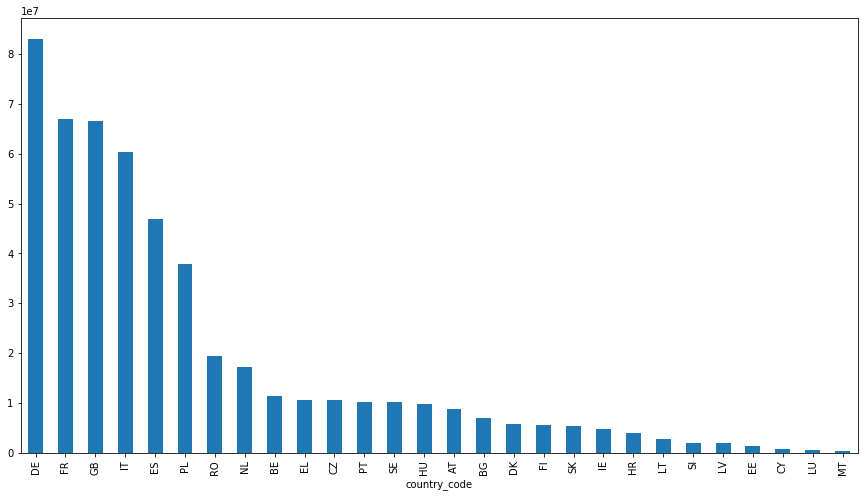

In [45]:
# Plot the population of the countries, in descending order
populations = df['population'].sort_values(ascending=False)
populations.plot.bar(figsize=(15,8))    # figure size in inches: 1 inch ≃ 2.5 cm

It is possible to improve the plots, such as adding a title for the figure and modifying the axes labels. You can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).

Text(0.5, 0, 'millions')

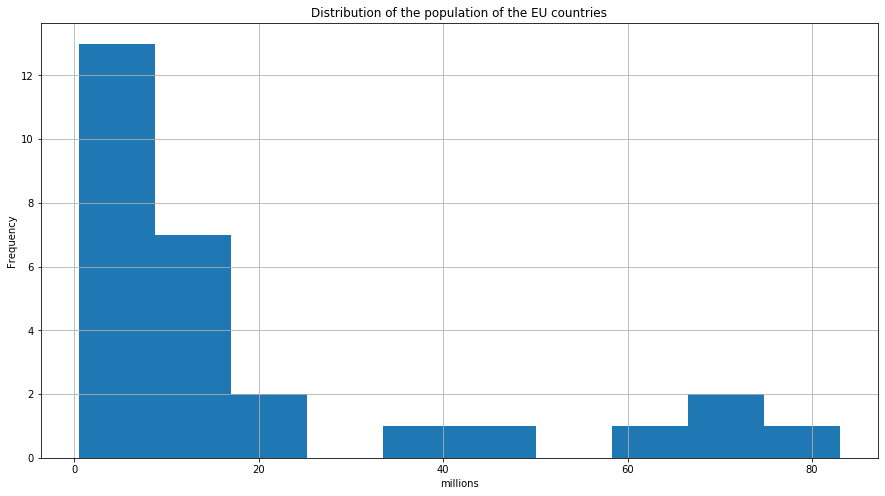

In [46]:
# Plot a histogram of the population of EU countries (in millions)
populations = df['population'] / 1e6
populations.plot.hist(figsize=(15,8), title="Distribution of the population of the EU countries", grid=True).set_xlabel("millions")

---------------------
## Serializing a dataframe

You can save the contents of a dataframe to a disk file. **pandas** natively support several formats (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion)):

In [85]:
# Save the dataset in 'parquet' format
df.to_parquet('../data/european_union-2019.parquet')

/Users/fabio/Developer/OpenSource/anaconda3-v5.1/lib/python3.7/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [86]:
%%bash

ls -al ../data/european_union-2019.*

-rw-r--r--@ 1 fabio  staff      2457 Feb 12 13:25 ../data/european_union-2019.csv
-rw-r--r--  1 fabio  staff  21488503 Feb 14 12:04 ../data/european_union-2019.parquet


In [87]:
new_df = pd.read_parquet("../data/european_union-2019.parquet")
new_df.sample(5)

/Users/fabio/Developer/OpenSource/anaconda3-v5.1/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/fabio/Developer/OpenSource/anaconda3-v5.1/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/fabio/Developer/OpenSource/anaconda3-v5.1/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,sex,name,year,department,count
516948,1,FRANCIS,1949,13,118
967345,1,LOUIS,1900,11,91
666048,1,HENRI,1960,07,7
2933396,2,MARIA,1989,29,3
1838092,2,ANNE,1938,57,168


---------------------
## Modifying the dataframe

You will often need to modify the dataframe, for instance, for cleaning it, for extending it or for computing new values useful in the data analysis process.

Please note that the modifications are applied to the in-memory data, not to the disk file, unless you explicitely save the dataframe to disk.

In [50]:
# Rename some dataframe columns to use shorter names
df = df.rename(columns={
    # current column name                      new column name
    'contribution_to_eu_budget_millions_euro': 'budget_contribution',
    'expenditure_eu_budget_millions_euro':     'budget_expenditure',
})
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8858775,True,111801,66144,3277.097350,1952.627788
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.758857,8513.575724
BG,Bulgaria,Sofia,2007-01-01,7000039,False,25597,31586,487.091948,2168.579910


You can also **extend the dataframe** by creating new columns, which values may be computed using other columns:

In [51]:
# Add the budget contribution and the budget expenditure per capita
df['budget_contribution_per_capita'] = (df['budget_contribution'] * 1_000_000 ) / df['population']
df['budget_expenditure_per_capita']  = (df['budget_expenditure']  * 1_000_000 ) / df['population']

df.head(4).style.applymap(highlight_column, subset=['budget_contribution_per_capita', 'budget_expenditure_per_capita'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
country_code,,,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8858775,True,111801,66144,3277.1,1952.63,369.927,220.417
BE,Belgium,Brussels,1957-03-25,11455519,True,126703,89690,3839.76,8513.58,335.189,743.186
BG,Bulgaria,Sofia,2007-01-01,7000039,False,25597,31586,487.092,2168.58,69.5842,309.795
CY,Cyprus,Nicosia,2004-05-01,875899,True,21306,15105,180.289,263.868,205.833,301.254


We can also compute a `Series` of values from the values in the columns of the dataframe:

In [52]:
# Compute the net contribution to the EU budget for each country
net_contribution_per_capita = df['budget_contribution_per_capita'] - df['budget_expenditure_per_capita']
net_contribution_per_capita.sort_values(ascending=True)

country_code
LU   -2690.071903
LT    -613.728173
HU    -534.373737
LV    -509.260724
EE    -414.581274
BE    -407.996955
PL    -325.674295
PT    -322.225865
EL    -315.389352
SK    -310.727248
SI    -260.041959
BG    -240.211228
CZ    -225.643486
RO    -165.358781
HR    -164.246220
MT    -108.200944
CY     -95.421360
ES     -41.684336
IE      52.295899
IT      80.817711
FR      86.480315
FI      97.975060
GB     102.461112
NL     137.386562
SE     145.579422
AT     149.509335
DE     159.153020
DK     194.629506
dtype: float64

In [53]:
print(f'The net contribution by France to the 2018 EU budget was approx. {net_contribution_per_capita["FR"]:.0f}€ per capita')

The net contribution by France to the 2018 EU budget was approx. 86€ per capita


We can use the methods `idxmin()` (or `idxmax()`) to retrieve the **index of the row** which contains the minimum (or maximum) value of a column, as opposed to the minium (or maximum) value itself. In our case, we can use this to retrieve the country code (i.e. the value of the dataframe index) and then the country name:

In [54]:
net_contribution_per_capita.idxmin(), net_contribution_per_capita.idxmax()

('LU', 'DK')

In [55]:
index_min, index_max = net_contribution_per_capita.idxmin(), net_contribution_per_capita.idxmax()
df.loc[[index_min, index_max]]

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
country_code,,,,,,,,,,,
LU,Luxembourg,Luxembourg City,1957-03-25,613894,True,24379,13831,356.911408,2008.330409,581.389309,3271.461212
DK,Denmark,Copenhaguen,1973-01-01,5806081,False,68579,56403,2541.231086,1411.196408,437.684401,243.054895


In [56]:
df.loc[[index_min, index_max], 'country']

country_code
LU    Luxembourg
DK       Denmark
Name: country, dtype: object

In [57]:
# Retrieve the code of the countries with minimum and maximum value on the
# 'net_contribution_per_capita' series (computed above)
country_min_expenditure = df.loc[net_contribution_per_capita.idxmin(), 'country']
country_max_expenditure = df.loc[net_contribution_per_capita.idxmax(), 'country']

print(f'The country with lowest EU budget expenditure per capita in 2018 was:  {country_min_expenditure}')
print(f'The country with highest EU budget expenditure per capita in 2018 was: {country_max_expenditure}')

The country with lowest EU budget expenditure per capita in 2018 was:  Luxembourg
The country with highest EU budget expenditure per capita in 2018 was: Denmark


----------
## Grouping

In some datasets, data is organized so that **grouping the observations** (i.e. the rows) is necessary to answer some analysis questions. **pandas** provides useful tools for grouping rows based on the values of one or more columns.

The data in the dataset we have been working on does not require grouping. We load a different, more complex and bigger dataset to explore how grouping works.

### load another dataset

The dataset we will use contains data about the names given to babies in France during from year 1900 to year 2017. For each given name you can find the sex of the baby (male or female), the year of birth, the department and the number of babies registered with that given name per year and per department.

You can find details of this public dataset, including the exact meaning of each variable (in French),  at https://www.insee.fr/fr/statistiques/2540004

In [58]:
%%bash

force_download=false  # Set to 'true' to force download
dataset_location='https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2018_csv.zip'
dataset_file_name='../data/prenoms-fr-1900-2018.csv.zip'

if [[ ${force_download} == true || ! -e ${dataset_file_name} ]]; then
   mkdir -p '../data'
   curl --silent -L --output ${dataset_file_name} ${dataset_location}
fi

ls -lh ${dataset_file_name}

-rw-r--r--  1 fabio  staff    12M Feb 13 11:00 ../data/prenoms-fr-1900-2018.csv.zip


In [59]:
# Forget the dataset we have been using so far
del df

# Load another dataset. Its fields are separated by ';'.
# We ask pandas to interpret the columns 'annais' and 'dpt' as strings to avoid error with missing
# values
df = pd.read_csv('../data/prenoms-fr-1900-2018.csv.zip', sep=';', dtype={'annais':str, 'dpt':str})
rows, cols = df.shape
print(f'This dataset contains {rows:,} rows and {cols} columns')

This dataset contains 3,624,994 rows and 5 columns


In [60]:
df.sample(8)

,sexe,preusuel,annais,dpt,nombre
2328073,2,EVA,2006,52,11
3153035,2,MYRIAM,2002,974,13
1567732,1,VALERY,1962,02,3
764202,1,JEAN-FRANÇOIS,1943,33,7
3480632,2,STÉPHANIE,1980,18,47
807647,1,JEAN-YVES,1949,26,6
2381764,2,FRANCA,1962,54,3
1843283,2,ANNE,1994,74,10


Below you can find an edited excerpt of the [meaning and coding conventions of the columns](https://www.insee.fr/fr/statistiques/2540004#dictionnaire) of this dataset. You may also want to read the excellent [documentation associated to this dataset](https://www.insee.fr/fr/statistiques/2540004#documentation):

*Le second fichier départemental comporte 3 624 994 enregistrements et cinq variables décrites ci-après.*
*Ce fichier est trié selon les variables `SEXE`, `PREUSUEL`, `ANNAIS`, `DPT`.*

* `SEXE`: sexe - Type : caractère - Longueur : 1 - Modalité : 1 pour masculin, 2 pour féminin
* `PREUSUEL`: premier prénom - Type : caractère - Longueur : 25
* `ANNAIS`: année de naissance - Type : caractère - Longueur : 4 - Modalité : 1900 à 2018, XXXX
* `DPT`: département de naissance - Type : caractère - Longueur : 3 - Modalité : liste des départements, XX
* `NOMBRE`: fréquence - Type : numérique - Longueur : 8

In [61]:
# Inspect the types of the columns dataset
df.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

### cleaning the dataset

In [62]:
# This is a utility function we use for displaying the dataframe
def highlight_missing(s):
    missings = ('XX', 'XXXX', '_PRENOMS_RARES')
    return 'color: white; background-color: Crimson' if s in missings else ''

In [63]:
# Rename some columns to use more meaningful names
df = df.rename(columns={
    'sexe':      'sex',
    'preusuel':  'name',
    'annais':    'year',
    'dpt':       'department',
    'nombre':    'count'})

df.head().style.applymap(highlight_missing, subset=['year', 'department'])

,sex,name,year,department,count
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


As you can see above, there are rows with missing values, which in this case are represented by the strings `XXXX` for year or `XX` for the department. For the purposes of this tutorial, we ignore those rows:

In [64]:
# Drop rows with missing department and year
df.drop(df[df['department'] == 'XX'].index, inplace=True)
df.drop(df[df['year'] == 'XXXX'].index, inplace=True)

# Convert columns 'department' and 'year' to numeric values
### df['department'] = pd.to_numeric(df['department'])
df['year']       = pd.to_numeric(df['year'])

df.dtypes

sex            int64
name          object
year           int64
department    object
count          int64
dtype: object

In this dataset, some given names are coded as `_PRENOMS_RARES`, to represent a group of given names used very few times (see the dataset documentation for details). For this exercise, we are not interested in that data, so we remove the rows in the dataset which contain that given name:

In [65]:
is_rare = df['name'] == '_PRENOMS_RARES'
df[is_rare].head().style.applymap(highlight_missing, subset=['name'])

,sex,name,year,department,count
1666882,1,_PRENOMS_RARES,1900,02,7
1666883,1,_PRENOMS_RARES,1900,04,9
1666884,1,_PRENOMS_RARES,1900,05,8
1666885,1,_PRENOMS_RARES,1900,06,23
1666886,1,_PRENOMS_RARES,1900,07,9


In [66]:
df.drop(df[is_rare].index, inplace=True)

Check that there is no rows which contains `_PRENOMS_RARES` in the column `name`:

In [67]:
df[df['name'] == '_PRENOMS_RARES'].count()

sex           0
name          0
year          0
department    0
count         0
dtype: int64

### explore the dataset

In this dataset, the column `sex` is coded as `1` (one) for males and `2` (two) for females. Create two views of the dataset, one for boys and one for girls:

In [68]:
# For convenience, create two views of the dataset
boys  = df[df['sex'] == 1]
girls = df[df['sex'] == 2]

# Count the number of babies of each sex contained in the dataset
print(f"Babies registered from 1900 to 2018:")
print(f"   boys: {boys['count'].sum():,}")
print(f"  girls: {girls['count'].sum():,}")
print(f"  total: {df['count'].sum():,}")

Babies registered from 1900 to 2018:
   boys: 38,444,247
  girls: 36,860,127
  total: 75,304,374


### aside: configure matplotlib

In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (8,4)
matplotlib.rcParams["figure.dpi"] = 150
matplotlib.rcParams["font.size"] = 12

### grouping rows

We want to plot the evolution of the babies over time. We group the rows by the value in the column `year` and for each resulting group we sum the values of the `count` column to obtain the total number of babies registered each year:

In [70]:
babies_per_year = df.groupby(['year'])['count'].sum()
babies_per_year

year
1900    390498
1901    428641
1902    440831
1903    443609
1904    453685
         ...  
2014    568896
2015    550745
2016    534851
2017    520487
2018    510281
Name: count, Length: 119, dtype: int64

(0, 891296.45)

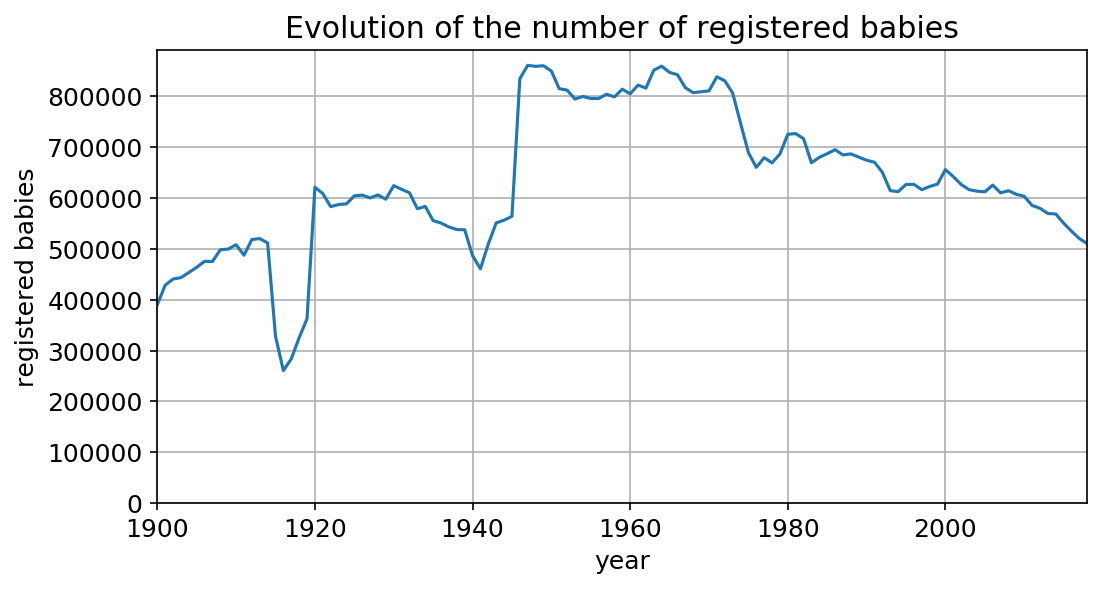

In [71]:
fig = babies_per_year.plot.line(title="Evolution of the number of registered babies", grid=True)
fig.set_ylabel("registered babies")
fig.set_ylim(0)

We may want to focus on a subset of the rows. For instance, zoom in on the data over the period 1910 to 1925:

(0, 639536.9)

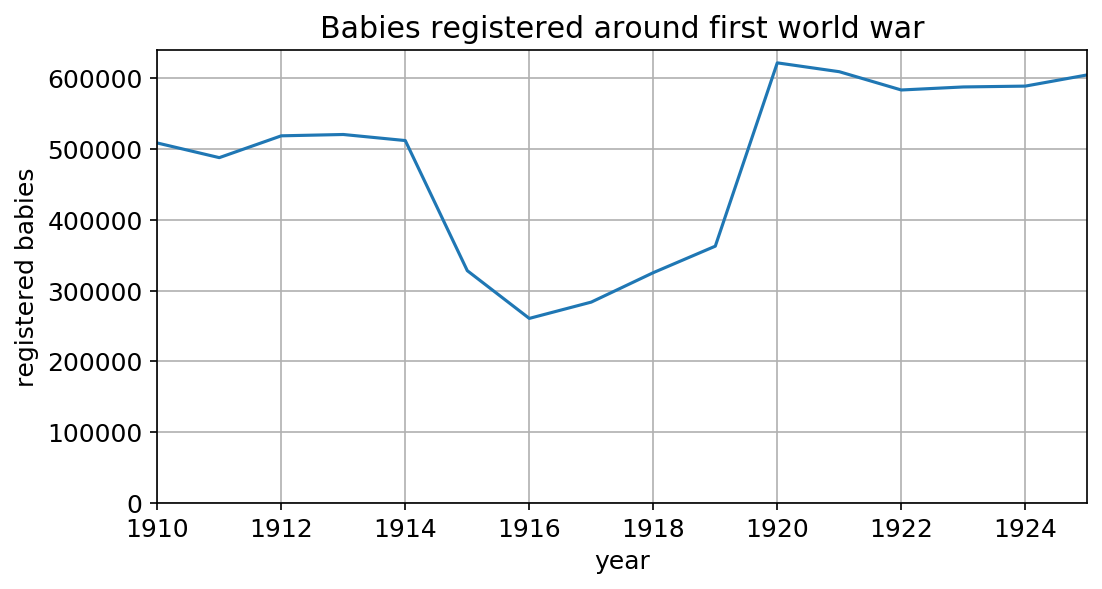

In [89]:
first_ww = babies_per_year.loc[1910:1925].plot.line(title="Babies registered around first world war", grid=True)
first_ww.set_ylabel("registered babies")
first_ww.set_ylim(0)

We want to know how many boys were given the name **Zinedine** before an after year 1998, when France won the football world cup:

In [73]:
zinedines = boys[boys['name'] == 'ZINEDINE']
zinedines_before_1998 = zinedines[zinedines['year'] <  1998]['count'].sum()
zinedines_after_1998  = zinedines[zinedines['year'] >= 1998]['count'].sum()

print(f"Number of boys named 'Zinedine' in France:")
print(f"   before 1998: {zinedines_before_1998: 5}")
print(f"    since 1998:  {zinedines_after_1998: 5}")

Number of boys named 'Zinedine' in France:
   before 1998:    50
    since 1998:   1136


We want to get more details about the years those babies were named **Zinedine**, so we group the data by year: 

In [74]:
# Group the "zinedines" per year and sum the values of column 'count' for each year
zinedines_per_year = zinedines.groupby(['year'])['count'].sum()
zinedines_per_year.tail()

year
2014    17
2015    17
2016    25
2017    31
2018     6
Name: count, dtype: int64

Make a plot to visually explore the results of the operation above. For this we use **matplotlib**. Please ignore for now the details of how to use matplotlib. We look in more detail some aspects of data visualisation in [this notebook](visualisation.ipynb).

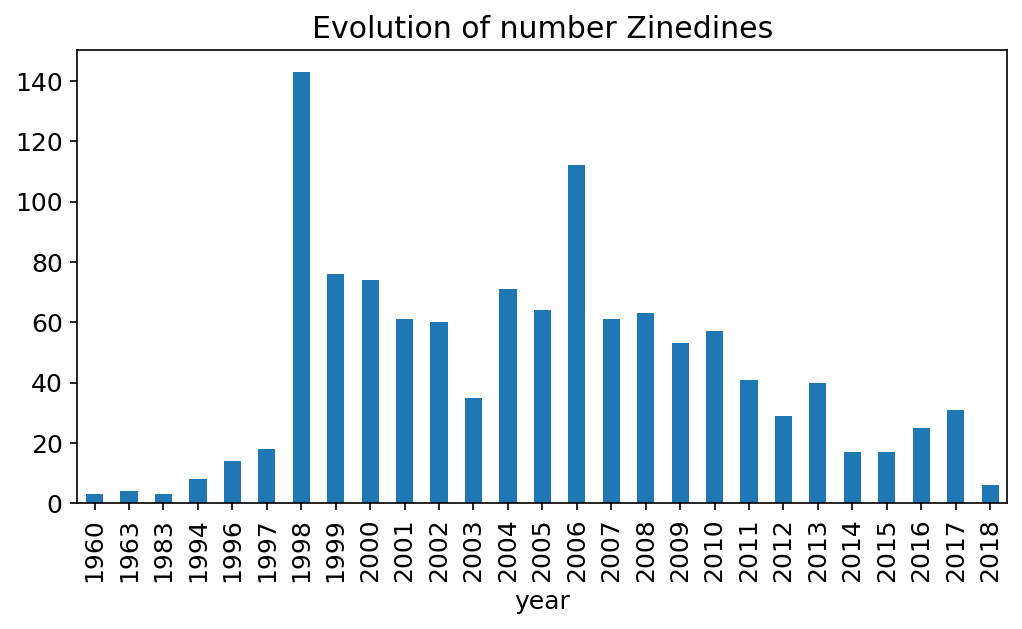

In [75]:
# Plot the number of "zinedines" as a function of the year
zinedines_per_year.plot.bar(title="Evolution of number Zinedines")

----------
## Joining dataframes

Motivating example: we want to select the top 5 departmens where were born the boys born in 1998 named *Zinedine*.

In [76]:
zinedines_1998 = boys[(boys['name'] == 'ZINEDINE') & (boys['year'] == 1998)]
zinedines_1998.nlargest(5, 'count')

,sex,name,year,department,count
1666039,1,ZINEDINE,1998,13,16
1666048,1,ZINEDINE,1998,59,13
1666050,1,ZINEDINE,1998,69,13
1666055,1,ZINEDINE,1998,92,12
1666056,1,ZINEDINE,1998,93,12


The data we have in our example dataframe does not include the name of the department associated to those values (e.g. 12, 69, 92, etc.). We will use an additional helper dataframe for retrieving the names of those departments.

### download dataset

In [2]:
%%bash

force_download=false  # Set to 'true' to force download
dataset_location='https://www.data.gouv.fr/en/datasets/r/987227fb-dcb2-429e-96af-8979f97c9c84'
dataset_file_name='../data/departements-region.csv'

if [[ ${force_download} == true || ! -e ${dataset_file_name} ]]; then
   mkdir -p '../data'
   curl --silent -L --output ${dataset_file_name} ${dataset_location}
fi

ls -lh ${dataset_file_name}

-rw-r--r--  1 fabio  staff   3.0K Feb 14 18:06 ../data/departements-region.csv


In [78]:
dept_df = pd.read_csv('../data/departements-region.csv', index_col=0)
rows, cols = dept_df.shape
print(f'This dataset contains {rows:,} rows and {cols} columns')

This dataset contains 101 rows and 2 columns


In [79]:
dept_df.sample(5)

,dep_name,region_name
num_dep,,
18,Cher,Centre-Val de Loire
50,Manche,Normandie
94,Val-de-Marne,Île-de-France
43,Haute-Loire,Auvergne-Rhône-Alpes
68,Haut-Rhin,Grand Est


Now we can **join** both dataframes to include all the data we need in each row, in particular the name of the department:

In [101]:
# Join both datasets using the index of 'dept_df' and the column 'department' of the 'zinedines_1998' dataframe
zinedines_1998 = boys[(boys['name'] == 'ZINEDINE') & (boys['year'] == 1998)]
zinedines_1998_full = zinedines_1998.join(dept_df, on='department')

zinedines_1998_full.sample(5).style.applymap(highlight_column, subset=['department', 'dep_name'])

,sex,name,year,department,count,dep_name,region_name
1666053,1,ZINEDINE,1998,83,4,Var,Provence-Alpes-Côte d'Azur
1666050,1,ZINEDINE,1998,69,13,Rhône,Auvergne-Rhône-Alpes
1666047,1,ZINEDINE,1998,54,5,Meurthe-et-Moselle,Grand Est
1666043,1,ZINEDINE,1998,33,8,Gironde,Nouvelle-Aquitaine
1666054,1,ZINEDINE,1998,91,4,Essonne,Île-de-France


We have now a dataframe with contains the selected rows each with all the information we need to answer the question: *what are the names of the top 5 deparments where the boys born in 1998 were named 'Zinedine'?*

In [94]:
top_depts = zinedines_1998_full.nlargest(5, 'count')
top_depts[['count', 'dep_name']]

,count,dep_name
1666039,16,Bouches-du-Rhône
1666048,13,Nord
1666050,13,Rhône
1666055,12,Hauts-de-Seine
1666056,12,Seine-Saint-Denis


In [100]:
# Extract the values of the series
for count, dept in zip(top_depts['count'].values, top_depts['dep_name'].values):
    print(f'{count}  {dept}')

16  Bouches-du-Rhône
13  Nord
13  Rhône
12  Hauts-de-Seine
12  Seine-Saint-Denis


-------------
## Acknowledgements
<a id='Acknowledgements'></a>

These are the sources this notebook is based on. You are encouraged to consult them to deep further:

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jave VanderPlas (highly recommended book)
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* Data School [Pandas best practices](https://youtu.be/hl-TGI4550M) (video)
* Dunder Data's [Intro to Pandas](https://youtu.be/31wa8tmrkPU) video series
* Python Bootcamp organised by the [Berkeley Institute for Data Science (BIDS)](https://bids.berkeley.edu) in the Fall 2016: [videos](https://bids.berkeley.edu/news/python-boot-camp-fall-2016-training-videos-available-online) and [notebooks](https://github.com/profjsb/python-bootcamp)
* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653) 2nd Edition, by Wes McKinney